# Kamerun

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Obobogo

### Datierungen

In [2]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (t_Ort.ort_name LIKE '%Obobogo%')""".replace('\n',' ')

#           [t_Komplex].[bef_nr] AS PHASE,  # wird von der der Liste weiter unten geliefert

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

13

In [7]:
print('''Plot()
{''')
for index, row in df.iterrows():
#for index, row in df_merge[df_merge['PHASE'] == 'Group VI'].iterrows():
    print('R_Date("',row['SITE'], '-', row['LABNR'],'",', row['C14AGE'],',', row['C14STD'],');')
print('};')

Plot()
{
R_Date(" Obobogo - Hv-10580 ", 2055 , 70 );
R_Date(" Obobogo - Hv-10581 ", 6020 , 505 );
R_Date(" Obobogo - Hv-10582 ", 2900 , 110 );
R_Date(" Obobogo - Hv-10852 ", 2900 , 110 );
R_Date(" Obobogo - Hv-12845 ", 2300 , 65 );
R_Date(" Obobogo - Lv-1395 ", 2120 , 150 );
R_Date(" Obobogo - Hv-10832 ", 1990 , 95 );
R_Date(" Obobogo - Hv-10833 ", 2955 , 110 );
R_Date(" Obobogo - Hv-10583 ", 3070 , 95 );
R_Date(" Obobogo - Hv-11045 ", 2635 , 100 );
R_Date(" Obobogo - Lv-1432 ", 2310 , 100 );
R_Date(" Obobogo - Hv-11046 ", 3625 , 165 );
R_Date(" Obobogo - Lv-1394 ", 2120 , 70 );
};


## Nlend Nlend 2013/2014

### S. 257 Tab. 44

In [52]:
df = pd.read_csv('../lit/NlendNlend20132014_257Tab44.csv', decimal = ',')
df = df.fillna(0)
#df = df.sort_values(['SITE', 'FEATURE'])

df['14Ccal_mean'] = (df['14Ccal_btm'] + df['14Ccal_top']) / 2

#df = df.sort_values(['MALONGO', 'BWAMBE'])
df = df.sort_values(['14Ccal_mean'])
df = df.set_index(['SITE', 'FEATURE'])

df.head()

,,MALONGO,BWAMBE,MIXED,14Ccal_btm,14Ccal_top,14Ccal_mean
SITE,FEATURE,,,,,,
Bissiang,B,100.00,0.00,0.0,-1105,-805,-955.0
Mpolongwe-Kribi,31,94.15,5.85,0.0,-810,-720,-765.0
Bwambe,17,68.60,0.00,31.4,-850,-400,-625.0
Bissiang,A,100.00,0.00,0.0,-820,-425,-622.5
Dombe,B,100.00,0.00,0.0,-815,-420,-617.5


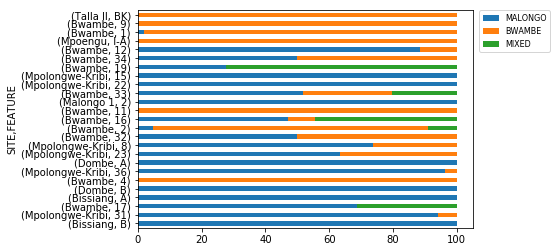

In [53]:
dfSel = df[['MALONGO', 'BWAMBE', 'MIXED']]
dfSel.plot(kind='barh', stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0., prop={'size':8})